In [221]:
# Import files
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [183]:
# import files
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [184]:
# import files
users = pd.read_csv('takehome_users.csv',encoding='latin-1',parse_dates=True)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [185]:
# check the info
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [244]:
#EDA
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [186]:
# EDA
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [187]:
# EDA
engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [188]:
# convert time_stamp column to a date_time index
engagement['time_stamp'] = pd.to_datetime(engagement.time_stamp)
engagement = engagement.set_index('time_stamp', drop=True)

In [190]:
# function to calculate whether an user is adopted or not

from datetime import timedelta

def label_adopted(x):    
    
    '''
     An "adopted user" is a user who has logged into the product   
     on three separate days in at least one seven day period 
    '''
    #select out rows of this user
    df_temp = engagement.loc[engagement['user_id'] == x] 
    #resample to show if active in a day. .mean() is just of 1
    df_temp = df_temp.resample('D').mean().dropna() 
    adopted = 0
    #loop over active days till the second to last day
    for i in range(len(df_temp)-2): 
        # difference between every 1st and 3rd day
        if df_temp.index[i + 2] - df_temp.index[i] <= timedelta(days=7): 
            adopted = 1
            break
        else:
            adopted = 0
    return adopted

In [192]:
#apply to user df to label users as adopted=true 
users['adopted_user'] = users['object_id'].apply(label_adopted)

In [203]:
# Count of adopted users
print ('Adopted users:', users[users.adopted_user ==1].adopted_user.value_counts()[1])
print ('Adoption rate:', users[users.adopted_user ==1].adopted_user.value_counts()[1]/len(users))

Adopted users: 1656
Adoption rate: 0.138


In [204]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [206]:
# drop irrevelant columns
users_cl = users.drop(['object_id','email','name','invited_by_user_id','org_id'],axis=1)

In [207]:
users_cl.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user
0,2014-04-22 03:53:30,GUEST_INVITE,1.398139e+09,1,0,0
1,2013-11-15 03:45:04,ORG_INVITE,1.396238e+09,0,0,1
2,2013-03-19 23:14:52,ORG_INVITE,1.363735e+09,0,0,0
3,2013-05-21 08:09:28,GUEST_INVITE,1.369210e+09,0,0,0
4,2013-01-17 10:14:20,GUEST_INVITE,1.358850e+09,0,0,0


In [208]:
# creation source 
users_cl.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [209]:
# on hot encoding for categorical variable 'creation_source'
users_cl = pd.get_dummies(users_cl, columns = ['creation_source'],drop_first=True)

In [210]:
users_cl.head()

,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,2014-04-22 03:53:30,1.398139e+09,1,0,0,0,0,0,0
1,2013-11-15 03:45:04,1.396238e+09,0,0,1,1,0,0,0
2,2013-03-19 23:14:52,1.363735e+09,0,0,0,1,0,0,0
3,2013-05-21 08:09:28,1.369210e+09,0,0,0,0,0,0,0
4,2013-01-17 10:14:20,1.358850e+09,0,0,0,0,0,0,0


In [216]:
# covert creation_time and last_session_creation_time columns to datetime
users_cl['creation_time'] = pd.to_datetime(
    users_cl['creation_time'], format='%Y-%m-%d %H:%M:%S')
users_cl['last_session_creation_time'] = pd.to_datetime(
    users_cl['last_session_creation_time'], unit='s')

In [217]:
# Check how active the user is after account creation. If the time difference between the recent 
#login and the account creation time is high, it is highly likely that the user is an adopted user 
users_cl['activity'] = users_cl['last_session_creation_time'] - users_cl['creation_time']
users_cl['activity'] = users_cl['activity'].dt.days
users_cl.activity.fillna(value =0,inplace=True)

In [219]:
# Check the age of the user account. 
users_cl['account_age'] =  users_cl.last_session_creation_time.max()-users_cl.creation_time
users_cl['account_age'] = users_cl['account_age'].dt.days
users_cl.account_age.fillna(value =0,inplace=True)

In [243]:
# Cheking the imbalace in the class.
users_cl.adopted_user.value_counts(normalize=True)

0    0.862
1    0.138
Name: adopted_user, dtype: float64

In [237]:
# Use the SMOTE algorithm to make the imbalanced class balanced
from imblearn.over_sampling import SMOTE

# Separate input features and target
X = users_cl.drop(['adopted_user','last_session_creation_time','creation_time'],axis=1)
y = users.adopted_user.values

# train test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

#class balance using SMOTE algorithm
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [238]:
#random forest classification
rf = RandomForestClassifier(n_estimators =150,max_depth =5, max_leaf_nodes =5)
rf.fit(X_train,y_train)
#predict
y_pred  =rf.predict(X_test)
#score
print('Accuracy of test set was', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy of test set was 0.9513888888888888
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3100
           1       0.75      0.97      0.85       500

   micro avg       0.95      0.95      0.95      3600
   macro avg       0.87      0.96      0.91      3600
weighted avg       0.96      0.95      0.95      3600



In [239]:
from sklearn import metrics

print ('recall: ',metrics.recall_score(y_pred,y_test))
print ('f1-score: ',metrics.f1_score(y_pred,y_test))

rf.feature_importances_

recall:  0.7527216174183515
f1-score:  0.8468941382327209


array([0.04010646, 0.00546201, 0.10733665, 0.0985804 , 0.03197726,
       0.02628211, 0.64946612, 0.04078899])

In [235]:
feature_list = ['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH',
       'activity', 'account_age']
# Get numerical feature importances
importances = list(rf.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: activity             Importance: 0.6
Variable: creation_source_ORG_INVITE Importance: 0.12
Variable: creation_source_PERSONAL_PROJECTS Importance: 0.11
Variable: creation_source_SIGNUP Importance: 0.05
Variable: opted_in_to_mailing_list Importance: 0.04
Variable: account_age          Importance: 0.04
Variable: creation_source_SIGNUP_GOOGLE_AUTH Importance: 0.03
Variable: enabled_for_marketing_drip Importance: 0.01


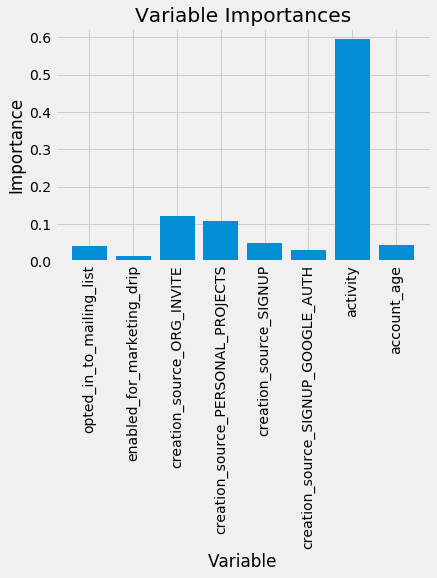

In [240]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
plt.style.use('fivethirtyeight')# list of x locations for plotting
x_values = list(range(len(importances)))# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

From the figure above, it can be inferred that activity, i.e., how long the acount is active based on logins is critical to know future adoption. If i user periodically logins their account, it is highly likely that he will be converted into and adopted user. 